#Рассчитайте ТОП-10 товаров, изменив в подмодели переменную N. Какой товар оказался на последнем, 10-м месте?

In [ ]:
#Рассчитайте ТОП-10 товаров, изменив в подмодели переменную N. Какой товар оказался на последнем, 10-м месте?
import pandas as pd

# 1. 读取数据
df = pd.read_csv("transactions.csv")

print("=" * 60)
print("产品销售额排名分析")
print("=" * 60)

# 2. 按产品汇总销售额
product_sales = df.groupby('item')['amount'].sum().reset_index()
product_sales.columns = ['产品', '累计销售额']

# 3. 按销售额降序排序
product_sales = product_sales.sort_values('累计销售额', ascending=False).reset_index(drop=True)

# 4. 显示前20名产品
print(f"\n产品总数: {len(product_sales)}")
print(f"总销售额: {product_sales['累计销售额'].sum():.2f}")

print("\n" + "=" * 60)
print("销售额排名前20的产品:")
print("=" * 60)

# 添加排名列
product_sales['排名'] = product_sales.index + 1
print(product_sales.head(20).to_string(index=False))

# 5. 查找第10名产品
if len(product_sales) >= 10:
    tenth_product = product_sales.iloc[9]  # 索引从0开始，所以第10名是索引9
    
    print("\n" + "=" * 60)
    print("排名第十的产品详情:")
    print("=" * 60)
    
    print(f"产品名称: {tenth_product['产品']}")
    print(f"累计销售额: {tenth_product['累计销售额']:.2f}")
    print(f"排名: {tenth_product['排名']}")
    
    # 计算该产品的销售额占比
    total_sales = product_sales['累计销售额'].sum()
    percentage = (tenth_product['累计销售额'] / total_sales) * 100
    print(f"销售额占比: {percentage:.2f}%")
    
    # 显示前后各2名产品对比
    print("\n附近排名对比:")
    print("-" * 50)
    print(f"{'排名':<6} {'产品':<15} {'累计销售额':<15} {'与前一名差距':<15}")
    print("-" * 50)
    
    # 从第8名到第12名
    for i in range(7, 12):
        if i < len(product_sales):
            product = product_sales.iloc[i]
            prev_product = product_sales.iloc[i-1] if i > 0 else None
            if prev_product is not None:
                diff = prev_product['累计销售额'] - product['累计销售额']
                diff_str = f"{diff:.2f}" if diff > 0 else "0.00"
            else:
                diff_str = "-"
            
            # 标记第10名
            mark = "← 第10名" if i == 9 else ""
            print(f"{product['排名']:<6} {product['产品']:<15} {product['累计销售额']:<15.2f} {diff_str:<15} {mark}")
    
   
    
    # 7. 与其他排名的对比分析
    print("\n" + "=" * 60)
    print("与相邻排名的销售额对比:")
    print("=" * 60)
    
    if len(product_sales) >= 15:
        top_15 = product_sales.head(15).copy()
        top_15['与第10名差距'] = top_15['累计销售额'] - tenth_product['累计销售额']
        
        print(f"{'排名':<6} {'产品':<15} {'累计销售额':<15} {'与第10名差距':<15}")
        print("-" * 55)
        
        for idx, row in top_15.iterrows():
            if row['排名'] == 10:
                print(f"{row['排名']:<6} {row['产品']:<15} {row['累计销售额']:<15.2f} {'---基准---':<15}")
            else:
                diff = row['与第10名差距']
                diff_str = f"+{diff:.2f}" if diff > 0 else f"{diff:.2f}"
                print(f"{row['排名']:<6} {row['产品']:<15} {row['累计销售额']:<15.2f} {diff_str:<15}")
    
    # 8. 保存结果到文件
    product_sales.to_csv('产品销售额排名.csv', index=False, encoding='utf-8-sig')
    print(f"\n✅ 完整排名已保存到: 产品销售额排名.csv")
    
    # 9. 可视化前20名产品
    import matplotlib.pyplot as plt
    
    print("\n📊 正在生成可视化图表...")
    
    plt.figure(figsize=(14, 8))
    
    # 前20名产品的条形图
    top_20 = product_sales.head(20).copy()
    bars = plt.barh(range(len(top_20)), top_20['累计销售额'])
    plt.yticks(range(len(top_20)), top_20['产品'])
    
    # 突出显示第10名
    if 9 < len(bars):
        bars[9].set_color('red')
    
    plt.xlabel('累计销售额')
    plt.title('产品累计销售额排名前20 (第10名用红色标出)')
    plt.gca().invert_yaxis()  # 倒序显示，第1名在最上面
    
    # 在条形上添加数值标签
    for i, (value, product) in enumerate(zip(top_20['累计销售额'], top_20['产品'])):
        plt.text(value, i, f' ¥{value:.0f}', va='center')
    
    plt.tight_layout()
    plt.savefig('产品销售额排名图.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ 排名图已保存为: 产品销售额排名图.png")
    
else:
    print(f"\n⚠️  产品总数不足10个，无法找到排名第十的产品")
    print(f"当前产品总数: {len(product_sales)}")

print("\n" + "=" * 60)
print("分析完成!")
print("=" * 60)

Какой товар чаще всего встречается в чеках?

Подсказка: воспользуйтесь визуализатором Статистика.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 读取数据
df = pd.read_csv("transactions.csv")

print("=" * 70)
print("产品出现频率分析")
print("=" * 70)

# 2. 检查数据基本信息
print(f"数据形状: {df.shape}")
print(f"总交易记录数: {len(df)}")
print(f"产品种类数: {df['item'].nunique()}")

# 3. 计算每个产品出现的频率（交易次数）
product_frequency = df['item'].value_counts().reset_index()
product_frequency.columns = ['产品', '出现次数']
product_frequency['频率百分比'] = (product_frequency['出现次数'] / len(df)) * 100

# 4. 排序并显示结果
product_frequency = product_frequency.sort_values('出现次数', ascending=False).reset_index(drop=True)

print(f"\n产品总数: {len(product_frequency)}")

# 5. 找出出现频率最高的产品
top_product = product_frequency.iloc[0]

print("\n" + "=" * 70)
print("出现频率最高的产品:")
print("=" * 70)
print(f"产品名称: {top_product['产品']}")
print(f"出现次数: {top_product['出现次数']}")
print(f"频率百分比: {top_product['频率百分比']:.2f}%")
print(f"平均每 {len(df)/top_product['出现次数']:.1f} 笔交易中就出现一次该产品")

# 6. 显示前20个高频产品
print("\n" + "=" * 70)
print("前20个高频产品:")
print("=" * 70)

# 添加排名列
product_frequency['排名'] = product_frequency.index + 1

# 显示前20名
print(product_frequency.head(20).to_string(index=False))

# 7. 详细分析最高频产品
print("\n" + "=" * 70)
print(f"产品 '{top_product['产品']}' 的详细分析:")
print("=" * 70)

# 获取该产品的详细交易记录
top_product_details = df[df['item'] == top_product['产品']].copy()

# 统计基本信息
print(f"总交易次数: {len(top_product_details)}")
print(f"总销售额: {top_product_details['amount'].sum():.2f}")
print(f"平均交易金额: {top_product_details['amount'].mean():.2f}")
print(f"总销售数量: {top_product_details['quantity'].sum()}")

# 按日期分析
top_product_details['tr_date'] = pd.to_datetime(top_product_details['tr_date'], format='%d.%m.%Y', errors='coerce')
top_product_details['year_month'] = top_product_details['tr_date'].dt.to_period('M')

print(f"\n销售时间范围: {top_product_details['tr_date'].min().date()} 到 {top_product_details['tr_date'].max().date()}")

# 按月统计销售情况
monthly_sales = top_product_details.groupby('year_month').agg({
    'amount': ['sum', 'count'],
    'quantity': 'sum'
}).reset_index()

monthly_sales.columns = ['年月', '总销售额', '交易次数', '总数量']
print(f"\n月度销售情况 (显示前6个月):")
print(monthly_sales.head(6).to_string(index=False))

# 按客户分析
customer_purchases = top_product_details.groupby('client').agg({
    'amount': ['sum', 'count'],
    'quantity': 'sum'
}).reset_index()

customer_purchases.columns = ['客户', '总消费额', '购买次数', '总购买数量']
customer_purchases = customer_purchases.sort_values('购买次数', ascending=False)

print(f"\n购买该产品的客户数: {len(customer_purchases)}")
print(f"购买次数最多的客户: {customer_purchases.iloc[0]['客户']} (购买{customer_purchases.iloc[0]['购买次数']}次)")


# 9. 与第二、第三名对比
print("\n" + "=" * 70)
print("前三名高频产品对比:")
print("=" * 70)

top_3 = product_frequency.head(3)
print(f"{'排名':<6} {'产品':<15} {'出现次数':<12} {'频率百分比':<12} {'与前一名的差距':<15}")
print("-" * 60)

for idx, row in top_3.iterrows():
    if idx == 0:
        gap = 0
    else:
        prev_count = top_3.iloc[idx-1]['出现次数']
        gap = prev_count - row['出现次数']
    
    gap_str = f"{gap}次" if gap > 0 else "领先"
    print(f"{row['排名']:<6} {row['产品']:<15} {row['出现次数']:<12} {row['频率百分比']:<11.2f}% {gap_str:<15}")

# 10. 可视化
print("\n📊 正在生成可视化图表...")

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 创建图形
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('产品出现频率分析', fontsize=16, fontweight='bold')

# 子图1: 前20名高频产品条形图
ax1 = axes[0, 0]
top_20 = product_frequency.head(20).copy()
bars1 = ax1.barh(range(len(top_20)), top_20['出现次数'])
ax1.set_yticks(range(len(top_20)))
ax1.set_yticklabels(top_20['产品'])
ax1.invert_yaxis()  # 倒序显示，第1名在最上面
ax1.set_xlabel('出现次数')
ax1.set_title('前20名高频产品')
# 突出显示第一名
bars1[0].set_color('red')

# 在条形上添加数值
for i, (value, product) in enumerate(zip(top_20['出现次数'], top_20['产品'])):
    ax1.text(value, i, f' {value}次', va='center')


Какой товар лидирует по итогам продаж за последние 3 месяца?

In [ ]:
import pandas as pd
from datetime import datetime

# 1. 读取数据
df = pd.read_csv("transactions.csv")

# 2. 转换日期格式
df['tr_date'] = pd.to_datetime(df['tr_date'], format='%d.%m.%Y', errors='coerce')

# 3. 确定过去三个月的起止日期
latest_date = df['tr_date'].max()
three_months_ago = latest_date - pd.DateOffset(months=3)

print("=" * 60)
print("过去三个月销量最好的产品")
print("=" * 60)
print(f"分析时间段: {three_months_ago.date()} 到 {latest_date.date()}")

# 4. 筛选过去三个月的数据
recent_df = df[(df['tr_date'] >= three_months_ago) & (df['tr_date'] <= latest_date)]

if len(recent_df) == 0:
    print("错误: 过去三个月没有交易数据!")
    exit()

print(f"过去三个月交易数量: {len(recent_df)}")

# 5. 计算每个产品的总销售数量
product_sales = recent_df.groupby('item')['quantity'].sum().reset_index()
product_sales.columns = ['产品', '销售数量']

# 6. 按销售数量降序排序
product_sales = product_sales.sort_values('销售数量', ascending=False).reset_index(drop=True)

# 7. 找出销量最好的产品
best_product = product_sales.iloc[0]

print("\n" + "=" * 60)
print("销量最好的产品:")
print("=" * 60)
print(f"产品名称: {best_product['产品']}")
print(f"销售数量: {best_product['销售数量']}")

# 8. 简单条形图显示前5名产品
import matplotlib.pyplot as plt

top_5 = product_sales.head(5).copy()

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5['产品'], top_5['销售数量'], color='lightblue')
# 突出显示第一名
bars[0].set_color('red')

plt.xlabel('销售数量')
plt.title(f'过去三个月销量前5名产品\n({three_months_ago.date()} 到 {latest_date.date()})')
plt.gca().invert_yaxis()  # 倒序显示，第1名在最上面

# 在条形上添加数值标签
for i, (value, product) in enumerate(zip(top_5['销售数量'], top_5['产品'])):
    plt.text(value, i, f' {value}', va='center')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("分析完成!")
print("=" * 60)

В какой день было самое большое число уникальных посетителей? Ответ запишите в формате ДД.ММ.ГГГГ

In [ ]:
import pandas as pd

# 1. 读取数据
df = pd.read_csv("transactions.csv")

# 2. 转换日期格式
df['tr_date'] = pd.to_datetime(df['tr_date'], format='%d.%m.%Y', errors='coerce')

# 3. 按日期统计独立访客数
# 独立访客 = 每天不同的client数量
daily_visitors = df.groupby(df['tr_date'].dt.date)['client'].nunique().reset_index()
daily_visitors.columns = ['日期', '独立访客数']

# 4. 按独立访客数降序排序
daily_visitors = daily_visitors.sort_values('独立访客数', ascending=False).reset_index(drop=True)

# 5. 获取独立访客数最多的那一天
if len(daily_visitors) > 0:
    best_day = daily_visitors.iloc[0]
    
    # 将日期转换为日/月/年格式
    best_day_date = pd.to_datetime(best_day['日期'])
    formatted_date = best_day_date.strftime('%d/%m/%Y')
    
    print(f"{formatted_date}")
else:
    print("没有找到数据")

Сколько товаров имеет группу "B" по итогам ABC-анализа на всех имеющихся данных?

Подсказка. Воспользуйтесь визуализатором "Статистика" или компонентом "Фильтр строк".

In [ ]:
import pandas as pd
import numpy as np

# 1. 读取数据
df = pd.read_csv("transactions.csv")

print("=" * 60)
print("ABC分析 - B组产品数量统计")
print("=" * 60)

# 2. 计算每个产品的总销售额
product_sales = df.groupby('item')['amount'].sum().reset_index()
product_sales.columns = ['产品', '总销售额']

# 3. 按销售额降序排序
product_sales = product_sales.sort_values('总销售额', ascending=False).reset_index(drop=True)

# 4. 计算累计销售额和累计百分比
product_sales['累计销售额'] = product_sales['总销售额'].cumsum()
total_sales = product_sales['总销售额'].sum()
product_sales['累计百分比'] = (product_sales['累计销售额'] / total_sales) * 100

# 5. 分配ABC类别
def assign_abc_category(cum_percentage):
    if cum_percentage <= 80:
        return 'A'
    elif cum_percentage <= 95:
        return 'B'
    else:
        return 'C'

product_sales['ABC类别'] = product_sales['累计百分比'].apply(assign_abc_category)

# 6. 统计B组产品数量
b_group_count = product_sales[product_sales['ABC类别'] == 'B'].shape[0]

# 7. 输出结果
print(f"总产品数量: {len(product_sales)}")
print(f"总销售额: {total_sales:.2f}")
print(f"B组产品数量: {b_group_count}")

# 8. 验证计算逻辑
a_group_count = product_sales[product_sales['ABC类别'] == 'A'].shape[0]
c_group_count = product_sales[product_sales['ABC类别'] == 'C'].shape[0]

print(f"\n验证: A组({a_group_count}) + B组({b_group_count}) + C组({c_group_count}) = 总产品数({len(product_sales)})")

# 9. 显示B组产品的示例
b_products = product_sales[product_sales['ABC类别'] == 'B']
print(f"\nB组产品示例 (前10个):")
print(b_products[['产品', '总销售额', '累计百分比']].head(10).to_string(index=False))

print("\n" + "=" * 60)
print(f"答案: B组产品共有 {b_group_count} 种")
print("=" * 60)

Получите ABC-XYZ-матрицу на данных за последние 6 месяцев. Сколько товаров попало в сегмент CZ?

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 1. 读取数据
df = pd.read_csv("transactions.csv")

# 2. 转换日期格式
df['tr_date'] = pd.to_datetime(df['tr_date'], format='%d.%m.%Y', errors='coerce')

# 3. 确定过去六个月的起止日期
latest_date = df['tr_date'].max()
six_months_ago = latest_date - pd.DateOffset(months=6)

print("=" * 70)
print("ABC-XYZ矩阵分析 (基于过去六个月数据)")
print("=" * 70)
print(f"分析时间段: {six_months_ago.date()} 到 {latest_date.date()}")

# 4. 筛选过去六个月的数据
recent_df = df[(df['tr_date'] >= six_months_ago) & (df['tr_date'] <= latest_date)]

if len(recent_df) == 0:
    print("错误: 过去六个月没有交易数据!")
    exit()

print(f"过去六个月交易数量: {len(recent_df)}")
print(f"过去六个月产品种类数: {recent_df['item'].nunique()}")

# 5. ABC分析 (基于销售额)
print("\n" + "=" * 70)
print("ABC分析 (基于销售额)")
print("=" * 70)

# 计算每个产品的总销售额
item_sales = recent_df.groupby('item')['amount'].sum().reset_index()
item_sales = item_sales.sort_values('amount', ascending=False).reset_index(drop=True)

# 计算累计百分比
item_sales['cumulative_amount'] = item_sales['amount'].cumsum()
total_amount = item_sales['amount'].sum()
item_sales['cumulative_percentage'] = (item_sales['cumulative_amount'] / total_amount) * 100

# 分配ABC类别
def assign_abc_category(cum_percentage):
    if cum_percentage <= 80:
        return 'A'
    elif cum_percentage <= 95:
        return 'B'
    else:
        return 'C'

item_sales['abc_category'] = item_sales['cumulative_percentage'].apply(assign_abc_category)

# 6. XYZ分析 (基于销售数量的稳定性)
print("\n" + "=" * 70)
print("XYZ分析 (基于销售数量的稳定性)")
print("=" * 70)

# 计算每个产品的销售数量统计
item_quantity_stats = recent_df.groupby('item')['quantity'].agg(['mean', 'std', 'count']).reset_index()

# 计算变异系数 (CV)
def calculate_cv(row):
    if row['mean'] == 0:
        return np.nan
    return (row['std'] / row['mean']) * 100

item_quantity_stats['cv'] = item_quantity_stats.apply(calculate_cv, axis=1)

# 分配XYZ类别
def assign_xyz_category(cv_value):
    if pd.isna(cv_value):
        return 'Unknown'
    elif cv_value < 15:
        return 'X'
    elif 15 <= cv_value <= 25:
        return 'Y'
    else:
        return 'Z'

item_quantity_stats['xyz_category'] = item_quantity_stats['cv'].apply(assign_xyz_category)

# 7. 合并ABC和XYZ分析，构建ABC-XYZ矩阵
print("\n" + "=" * 70)
print("ABC-XYZ矩阵构建")
print("=" * 70)

# 合并两个分析结果
abc_xyz_df = pd.merge(
    item_sales[['item', 'amount', 'cumulative_percentage', 'abc_category']],
    item_quantity_stats[['item', 'mean', 'std', 'cv', 'xyz_category']],
    on='item',
    how='inner'
)

# 创建ABC-XYZ组合类别
abc_xyz_df['abc_xyz_category'] = abc_xyz_df['abc_category'] + abc_xyz_df['xyz_category']

# 8. 统计CZ细分市场的产品数量
cz_count = len(abc_xyz_df[abc_xyz_df['abc_xyz_category'] == 'CZ'])

# 9. 显示完整ABC-XYZ矩阵分布
matrix_counts = abc_xyz_df['abc_xyz_category'].value_counts()

# 创建矩阵显示
categories = ['A', 'B', 'C']
subcategories = ['X', 'Y', 'Z']
matrix = {}

for cat in categories:
    matrix[cat] = {}
    for subcat in subcategories:
        combo = f"{cat}{subcat}"
        count = matrix_counts.get(combo, 0)
        matrix[cat][subcat] = count

# 10. 输出结果
print("\nABC-XYZ矩阵分布:")
print("=" * 40)
print(f"{'':<5} {'X':<10} {'Y':<10} {'Z':<10}")
print("-" * 35)

for cat in categories:
    row = f"{cat}: "
    for subcat in subcategories:
        count = matrix[cat][subcat]
        row += f"{count:>5}个   "
    print(row)

print(f"\n总产品数: {len(abc_xyz_df)}")

# 11. 重点：CZ细分市场的详细信息
print("\n" + "=" * 70)
print(f"CZ细分市场分析 (C类且Z类)")
print("=" * 70)
print(f"CZ类产品数量: {cz_count}")

if cz_count > 0:
    cz_products = abc_xyz_df[abc_xyz_df['abc_xyz_category'] == 'CZ']
    
    print(f"\nCZ类产品详细列表:")
    print(cz_products[['item', 'amount', 'cv', 'abc_xyz_category']].to_string(index=False))
    
    # CZ类产品的统计信息
    print(f"\nCZ类产品统计:")
    print(f"  平均销售额: {cz_products['amount'].mean():.2f}")
    print(f"  总销售额: {cz_products['amount'].sum():.2f}")
    print(f"  销售额占比: {(cz_products['amount'].sum() / total_amount * 100):.2f}%")
    print(f"  平均变异系数: {cz_products['cv'].mean():.2f}%")
else:
    print("没有产品属于CZ细分市场")

# 12. 保存结果
output_file = 'abc_xyz_matrix_past_6_months.csv'
abc_xyz_df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n✅ 分析结果已保存到文件: {output_file}")

# 13. 答案输出
print("\n" + "=" * 70)
print("最终答案:")
print("=" * 70)
print(f"根据过去六个月的数据，ABC-XYZ矩阵中CZ细分市场的产品数量为: {cz_count}")
print("=" * 70)

Какая средняя сумма покупки у одновизитника?

Расчет сделайте на всех транзакциях из продаж.

Ответ округлите до ближайшего целого.



In [ ]:
import pandas as pd
import numpy as np

# 1. 读取数据
df = pd.read_csv("transactions.csv")

# 2. 计算总销售交易额
total_sales_amount = df['amount'].sum()

# 3. 计算平均单次购买金额
# 平均单次购买金额 = 总销售交易额 ÷ 交易次数
average_purchase_amount = total_sales_amount / len(df)

# 4. 四舍五入到最接近的整数
rounded_total_sales = round(total_sales_amount)
rounded_average = round(average_purchase_amount)

# 5. 输出结果
print("=" * 60)
print("销售数据分析")
print("=" * 60)
print(f"数据总交易笔数: {len(df)}")
print(f"总销售交易额 (未四舍五入): {total_sales_amount:.2f}")
print(f"总销售交易额 (四舍五入): {rounded_total_sales}")
print(f"平均单次购买金额 (未四舍五入): {average_purchase_amount:.2f}")
print(f"平均单次购买金额 (四舍五入): {rounded_average}")

print("\n" + "=" * 60)
print("最终答案:")
print("=" * 60)
print(f"1. 总销售交易额: {rounded_total_sales}")
print(f"2. 平均单次购买金额: {rounded_average}")
print("=" * 60)

Сколько в сети клиентов, которые совершили более 50 визитов за все время? Под визитом понимаем все чеки клиента в пределах одних суток.

Расчет сделайте на всех транзакциях из продаж.

In [ ]:
import pandas as pd
import numpy as np

# 1. 读取数据
df = pd.read_csv("transactions.csv")

print("=" * 70)
print("客户到访次数分析")
print("=" * 70)

# 2. 转换日期格式
df['tr_date'] = pd.to_datetime(df['tr_date'], format='%d.%m.%Y', errors='coerce')

# 3. 按客户和日期去重，计算到访次数
# "到访"定义为一天内的所有客户消费记录，所以同一天多次消费算一次到访
df['date_only'] = df['tr_date'].dt.date

# 计算每个客户的到访天数
client_visits = df.groupby('client')['date_only'].nunique().reset_index()
client_visits.columns = ['客户', '到访次数']

print(f"总客户数量: {len(client_visits)}")

# 4. 统计到访次数超过50次的客户
clients_over_50 = client_visits[client_visits['到访次数'] > 50]

# 5. 输出结果
print(f"到访次数超过50次的客户数量: {len(clients_over_50)}")

if len(clients_over_50) > 0:
    print(f"\n到访次数超过50次的客户详情 (前10个):")
    # 按到访次数降序排列
    clients_over_50_sorted = clients_over_50.sort_values('到访次数', ascending=False)
    print(clients_over_50_sorted.head(10).to_string(index=False))
    
    # 统计信息
    print(f"\n这些客户的到访次数统计:")
    print(f"  最高到访次数: {clients_over_50['到访次数'].max()}")
    print(f"  最低到访次数: {clients_over_50['到访次数'].min()}")
    print(f"  平均到访次数: {clients_over_50['到访次数'].mean():.1f}")
    print(f"  中位数到访次数: {clients_over_50['到访次数'].median():.1f}")
    
    # 客户到访次数分布
    print(f"\n客户到访次数分布:")
    bins = [0, 10, 20, 30, 40, 50, 100, 200, 500, float('inf')]
    labels = ['1-10次', '11-20次', '21-30次', '31-40次', '41-50次', '51-100次', '101-200次', '201-500次', '500+次']
    
    all_clients_binned = pd.cut(client_visits['到访次数'], bins=bins, labels=labels, right=False)
    distribution = all_clients_binned.value_counts().sort_index()
    
    for interval, count in distribution.items():
        percentage = (count / len(client_visits)) * 100
        print(f"  {interval}: {count}个客户 ({percentage:.1f}%)")
else:
    print("没有客户到访次数超过50次")

print("\n" + "=" * 70)
print("答案:")
print("=" * 70)
print(f"累计到访次数超过50次的客户共有: {len(clients_over_50)} 个")
print("=" * 70)

Сколько товаров в продажах со средневзвешенной ценой 10 рублей и менее?



In [ ]:
import pandas as pd
import numpy as np

# 1. 读取数据
df = pd.read_csv("transactions.csv")

print("=" * 70)
print("平均加权价格 ≤ 10 卢布的商品分析")
print("=" * 70)

# 2. 按商品计算总销售额和总销售数量
product_stats = df.groupby('item').agg({
    'amount': 'sum',      # 总销售额
    'quantity': 'sum'     # 总销售数量
}).reset_index()

# 3. 计算平均加权价格（总销售额 ÷ 总销售数量）
# 加权平均价格 = 总销售额 / 总销售数量
product_stats['平均加权价格'] = product_stats['amount'] / product_stats['quantity']

# 4. 筛选平均加权价格 ≤ 10 卢布的商品
low_price_products = product_stats[product_stats['平均加权价格'] <= 10]

# 5. 输出结果
print(f"商品总数: {len(product_stats)}")
print(f"平均加权价格 ≤ 10 卢布的商品数量: {len(low_price_products)}")

# 显示详细结果
if len(low_price_products) > 0:
    print(f"\n平均加权价格 ≤ 10 卢布的商品列表:")
    low_price_products_sorted = low_price_products.sort_values('平均加权价格')
    print(low_price_products_sorted[['item', '平均加权价格', 'amount', 'quantity']].head(20).to_string(index=False))
    
    print(f"\n这些商品的统计信息:")
    print(f"  最低平均加权价格: {low_price_products['平均加权价格'].min():.2f} 卢布")
    print(f"  最高平均加权价格: {low_price_products['平均加权价格'].max():.2f} 卢布")
    print(f"  平均加权价格: {low_price_products['平均加权价格'].mean():.2f} 卢布")
    print(f"  总销售额: {low_price_products['amount'].sum():.2f} 卢布")
    print(f"  总销售数量: {low_price_products['quantity'].sum()} 件")
    
    # 价格分布分析
    print(f"\n所有商品平均加权价格分布:")
    price_stats = product_stats['平均加权价格'].describe()
    print(f"  最低价格: {price_stats['min']:.2f} 卢布")
    print(f"  最高价格: {price_stats['max']:.2f} 卢布")
    print(f"  平均价格: {price_stats['mean']:.2f} 卢布")
    print(f"  中位数价格: {price_stats['50%']:.2f} 卢布")
    
    # 价格区间统计
    bins = [0, 5, 10, 20, 50, 100, 200, float('inf')]
    labels = ['0-5卢布', '5-10卢布', '10-20卢布', '20-50卢布', '50-100卢布', '100-200卢布', '200+卢布']
    product_stats['价格区间'] = pd.cut(product_stats['平均加权价格'], bins=bins, labels=labels, right=False)
    
    price_distribution = product_stats['价格区间'].value_counts().sort_index()
    print(f"\n商品价格分布:")
    for interval, count in price_distribution.items():
        percentage = (count / len(product_stats)) * 100
        print(f"  {interval}: {count}个商品 ({percentage:.1f}%)")
else:
    print("没有找到平均加权价格 ≤ 10 卢布的商品")

print("\n" + "=" * 70)
print("最终答案:")
print("=" * 70)
print(f"平均加权价格 ≤ 10 卢布的商品共有: {len(low_price_products)} 件")
print("=" * 70)

Получите список товаров, у которых изменился сегмент ABC-XYZ (сравниваем два периода: все периоды и последние 6 мес.). Сравниваем только товары, которые продавались в обоих периодах!

Какой средний коэффициент вариации у этих товаров? Ответ округлите до одного знака после запятой.



ABC-XYZ细分市场变化分析 (比较所有时期和最近6个月)
所有时期: 2017-09-01 到 2019-10-31
最近6个月: 2019-04-30 到 2019-10-31
所有时期产品数: 30566
最近6个月产品数: 21824

执行所有时期的ABC-XYZ分析...
执行最近6个月的ABC-XYZ分析...
合并分析结果...

在两个时期都有销售的产品总数: 21824
ABC-XYZ细分市场发生变化的产品数量: 8440

ABC-XYZ细分市场发生变化的产品列表:
--------------------------------------------------------------------------------
产品: sku9471
  所有时期: AZ (CV: 115.8%)
  最近6个月: CUnknown (CV: nan%)
  变化: AZ → CUnknown
----------------------------------------
产品: sku767
  所有时期: AX (CV: 14.2%)
  最近6个月: AY (CV: 15.1%)
  变化: AX → AY
----------------------------------------
产品: sku1277
  所有时期: AZ (CV: 29.3%)
  最近6个月: AX (CV: 12.4%)
  变化: AZ → AX
----------------------------------------
产品: sku13806
  所有时期: AX (CV: 12.7%)
  最近6个月: AY (CV: 17.8%)
  变化: AX → AY
----------------------------------------
产品: sku12097
  所有时期: AZ (CV: 25.6%)
  最近6个月: AX (CV: 0.0%)
  变化: AZ → AX
----------------------------------------
产品: sku4798
  所有时期: AY (CV: 23.1%)
  最近6个月: AZ (CV: 40.0%)
  变化: AY → AZ
----------------

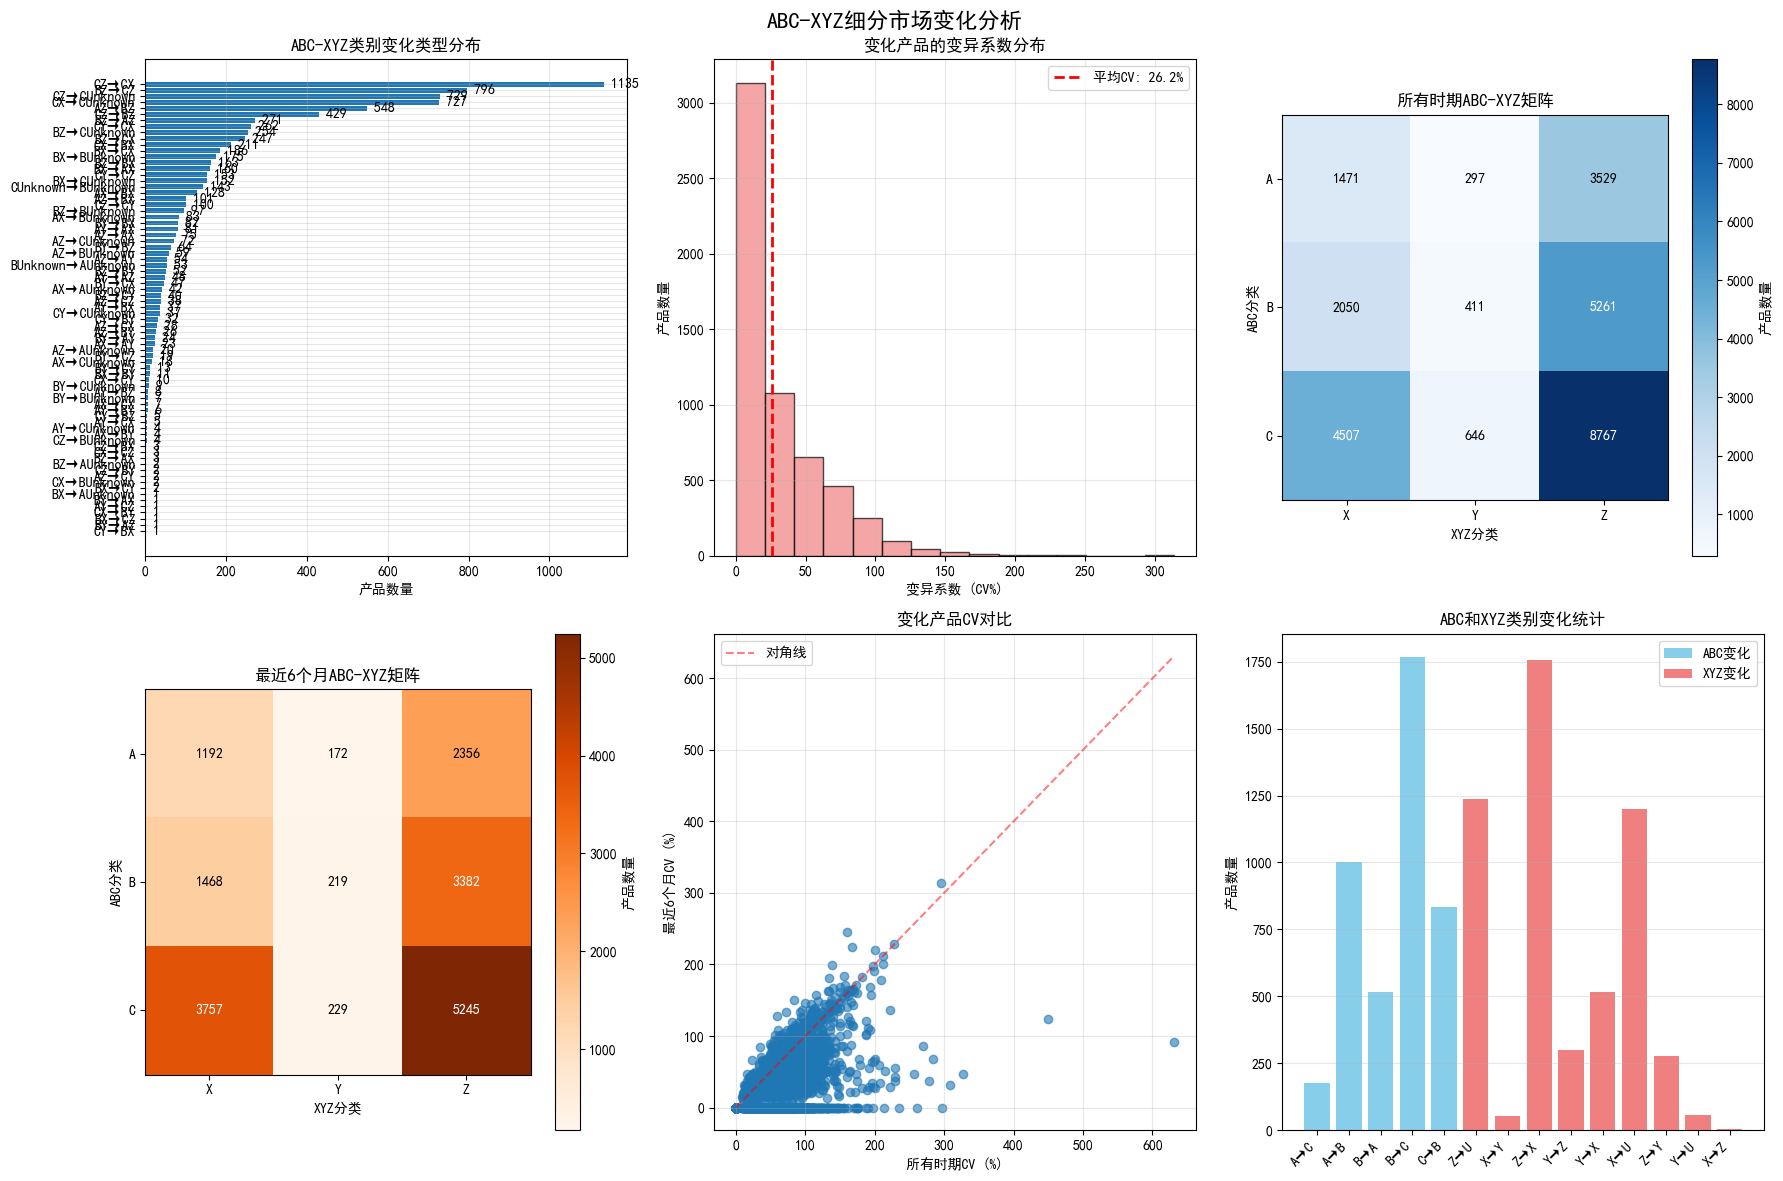

✅ 可视化图表已保存为: abc_xyz_change_analysis.png

最终答案:
ABC-XYZ细分市场发生变化的产品数量: 8440
这些产品的平均变异系数: 26.2%


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# 设置中文字体（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 1. 读取数据
df = pd.read_csv("transactions.csv")

# 2. 转换日期格式
df['tr_date'] = pd.to_datetime(df['tr_date'], format='%d.%m.%Y', errors='coerce')

print("=" * 80)
print("ABC-XYZ细分市场变化分析 (比较所有时期和最近6个月)")
print("=" * 80)

# 3. 获取所有时期的日期范围
all_df = df.copy()
latest_date = all_df['tr_date'].max()
six_months_ago = latest_date - pd.DateOffset(months=6)

# 4. 创建最近6个月的数据集
recent_df = df[(df['tr_date'] >= six_months_ago) & (df['tr_date'] <= latest_date)].copy()

print(f"所有时期: {all_df['tr_date'].min().date()} 到 {all_df['tr_date'].max().date()}")
print(f"最近6个月: {six_months_ago.date()} 到 {latest_date.date()}")
print(f"所有时期产品数: {all_df['item'].nunique()}")
print(f"最近6个月产品数: {recent_df['item'].nunique()}")

# 5. 定义ABC分析函数
def perform_abc_analysis(df):
    """执行ABC分析，返回每个产品的ABC类别"""
    # 计算每个产品的总销售额
    product_sales = df.groupby('item')['amount'].sum().reset_index()
    product_sales = product_sales.sort_values('amount', ascending=False).reset_index(drop=True)
    
    # 计算累计百分比
    product_sales['cumulative_amount'] = product_sales['amount'].cumsum()
    total_amount = product_sales['amount'].sum()
    product_sales['cumulative_percentage'] = (product_sales['cumulative_amount'] / total_amount) * 100
    
    # 分配ABC类别
    def assign_abc_category(cum_percentage):
        if cum_percentage <= 80:
            return 'A'
        elif cum_percentage <= 95:
            return 'B'
        else:
            return 'C'
    
    product_sales['abc_category'] = product_sales['cumulative_percentage'].apply(assign_abc_category)
    
    return product_sales[['item', 'amount', 'cumulative_percentage', 'abc_category']]

# 6. 定义XYZ分析函数
def perform_xyz_analysis(df):
    """执行XYZ分析，返回每个产品的XYZ类别和CV值"""
    # 计算每个产品的销售数量统计
    product_quantity_stats = df.groupby('item')['quantity'].agg(['mean', 'std', 'count']).reset_index()
    
    # 计算变异系数 (CV)
    def calculate_cv(row):
        if row['mean'] == 0:
            return np.nan
        return (row['std'] / row['mean']) * 100
    
    product_quantity_stats['cv'] = product_quantity_stats.apply(calculate_cv, axis=1)
    
    # 分配XYZ类别
    def assign_xyz_category(cv_value):
        if pd.isna(cv_value):
            return 'Unknown'
        elif cv_value < 15:
            return 'X'
        elif 15 <= cv_value <= 25:
            return 'Y'
        else:
            return 'Z'
    
    product_quantity_stats['xyz_category'] = product_quantity_stats['cv'].apply(assign_xyz_category)
    
    return product_quantity_stats[['item', 'mean', 'std', 'cv', 'xyz_category']]

# 7. 执行所有时期的ABC-XYZ分析
print("\n执行所有时期的ABC-XYZ分析...")
all_abc = perform_abc_analysis(all_df)
all_xyz = perform_xyz_analysis(all_df)
all_analysis = pd.merge(all_abc, all_xyz, on='item', how='inner')
all_analysis['abc_xyz_category'] = all_analysis['abc_category'] + all_analysis['xyz_category']
all_analysis.rename(columns={'abc_xyz_category': 'all_category', 'cv': 'all_cv'}, inplace=True)

# 8. 执行最近6个月的ABC-XYZ分析
print("执行最近6个月的ABC-XYZ分析...")
recent_abc = perform_abc_analysis(recent_df)
recent_xyz = perform_xyz_analysis(recent_df)
recent_analysis = pd.merge(recent_abc, recent_xyz, on='item', how='inner')
recent_analysis['abc_xyz_category'] = recent_analysis['abc_category'] + recent_analysis['xyz_category']
recent_analysis.rename(columns={'abc_xyz_category': 'recent_category', 'cv': 'recent_cv'}, inplace=True)

# 9. 合并两个时期的分析结果，只保留在两个时期都有销售的产品
print("合并分析结果...")
combined_analysis = pd.merge(
    all_analysis[['item', 'all_category', 'all_cv']],
    recent_analysis[['item', 'recent_category', 'recent_cv']],
    on='item',
    how='inner'  # 只保留在两个时期都有销售的产品
)

# 10. 找出ABC-XYZ细分市场发生变化的产品
changed_products = combined_analysis[combined_analysis['all_category'] != combined_analysis['recent_category']]

print(f"\n在两个时期都有销售的产品总数: {len(combined_analysis)}")
print(f"ABC-XYZ细分市场发生变化的产品数量: {len(changed_products)}")

# 11. 计算变化产品的平均变异系数（使用最近6个月的CV）
if len(changed_products) > 0:
    avg_cv = changed_products['recent_cv'].mean()
    
    print(f"\nABC-XYZ细分市场发生变化的产品列表:")
    print("-" * 80)
    
    # 显示前10个变化产品
    for idx, row in changed_products.head(10).iterrows():
        print(f"产品: {row['item']}")
        print(f"  所有时期: {row['all_category']} (CV: {row['all_cv']:.1f}%)")
        print(f"  最近6个月: {row['recent_category']} (CV: {row['recent_cv']:.1f}%)")
        print(f"  变化: {row['all_category']} → {row['recent_category']}")
        print("-" * 40)
    
    print(f"\n这些产品的平均变异系数: {avg_cv:.1f}%")
    
    # 12. 按变化类型统计
    print(f"\n变化类型分布:")
    change_types = []
    for idx, row in changed_products.iterrows():
        change_type = f"{row['all_category']}→{row['recent_category']}"
        change_types.append(change_type)
    
    change_type_counts = pd.Series(change_types).value_counts()
    for change_type, count in change_type_counts.items():
        print(f"  {change_type}: {count}个产品")
    
    # 13. 创建ABC-XYZ矩阵
    def create_category_matrix(df, category_col):
        """创建ABC-XYZ矩阵"""
        categories = ['A', 'B', 'C']
        subcategories = ['X', 'Y', 'Z']
        matrix = pd.DataFrame(index=categories, columns=subcategories, data=0)
        
        for cat in categories:
            for subcat in subcategories:
                category_name = cat + subcat
                count = len(df[df[category_col] == category_name])
                matrix.loc[cat, subcat] = count
        
        return matrix
    
    all_matrix = create_category_matrix(all_analysis, 'all_category')
    recent_matrix = create_category_matrix(recent_analysis, 'recent_category')
    
    print(f"\n所有时期的ABC-XYZ矩阵:")
    print(all_matrix)
    print(f"\n最近6个月的ABC-XYZ矩阵:")
    print(recent_matrix)
    
    # 14. 保存结果到文件
    output_df = changed_products.copy()
    output_df.columns = ['产品', '所有时期类别', '所有时期CV%', '最近6个月类别', '最近6个月CV%']
    output_df['变化'] = output_df['所有时期类别'] + '→' + output_df['最近6个月类别']
    
    output_df.to_csv('abc_xyz_changed_products.csv', index=False, encoding='utf-8-sig')
    print(f"\n✅ 变化产品列表已保存到: abc_xyz_changed_products.csv")
    
    # 15. 可视化分析
print("\n📊 正在生成可视化图表...")

# 创建图形
fig = plt.figure(figsize=(18, 12))
fig.suptitle('ABC-XYZ细分市场变化分析', fontsize=16, fontweight='bold')

# 子图1: 变化类型分布条形图
ax1 = plt.subplot(2, 3, 1)
change_type_counts_sorted = change_type_counts.sort_values(ascending=True)
bars1 = ax1.barh(range(len(change_type_counts_sorted)), change_type_counts_sorted.values)
ax1.set_yticks(range(len(change_type_counts_sorted)))
ax1.set_yticklabels(change_type_counts_sorted.index)
ax1.set_xlabel('产品数量')
ax1.set_title('ABC-XYZ类别变化类型分布')
ax1.grid(True, alpha=0.3)

# 在条形上添加数值
for i, v in enumerate(change_type_counts_sorted.values):
    ax1.text(v, i, f' {v}', va='center')

# 子图2: 变化产品的CV分布
ax2 = plt.subplot(2, 3, 2)
ax2.hist(changed_products['recent_cv'], bins=15, color='lightcoral', edgecolor='black', alpha=0.7)
ax2.axvline(avg_cv, color='red', linestyle='dashed', linewidth=2, label=f'平均CV: {avg_cv:.1f}%')
ax2.set_xlabel('变异系数 (CV%)')
ax2.set_ylabel('产品数量')
ax2.set_title('变化产品的变异系数分布')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 子图3: 所有时期ABC-XYZ矩阵热力图
ax3 = plt.subplot(2, 3, 3)
im3 = ax3.imshow(all_matrix.values, cmap='Blues')
ax3.set_xticks(np.arange(len(all_matrix.columns)))
ax3.set_yticks(np.arange(len(all_matrix.index)))
ax3.set_xticklabels(all_matrix.columns)
ax3.set_yticklabels(all_matrix.index)
ax3.set_xlabel('XYZ分类')
ax3.set_ylabel('ABC分类')
ax3.set_title('所有时期ABC-XYZ矩阵')
plt.colorbar(im3, ax=ax3, label='产品数量')

# 在热力图中添加数值
for i in range(len(all_matrix.index)):
    for j in range(len(all_matrix.columns)):
        text = ax3.text(j, i, all_matrix.iloc[i, j],
                      ha="center", va="center", color="white" if all_matrix.iloc[i, j] > all_matrix.values.max()/2 else "black")

# 子图4: 最近6个月ABC-XYZ矩阵热力图
ax4 = plt.subplot(2, 3, 4)
im4 = ax4.imshow(recent_matrix.values, cmap='Oranges')
ax4.set_xticks(np.arange(len(recent_matrix.columns)))
ax4.set_yticks(np.arange(len(recent_matrix.index)))
ax4.set_xticklabels(recent_matrix.columns)
ax4.set_yticklabels(recent_matrix.index)
ax4.set_xlabel('XYZ分类')
ax4.set_ylabel('ABC分类')
ax4.set_title('最近6个月ABC-XYZ矩阵')
plt.colorbar(im4, ax=ax4, label='产品数量')

# 在热力图中添加数值
for i in range(len(recent_matrix.index)):
    for j in range(len(recent_matrix.columns)):
        text = ax4.text(j, i, recent_matrix.iloc[i, j],
                      ha="center", va="center", color="white" if recent_matrix.iloc[i, j] > recent_matrix.values.max()/2 else "black")

# 子图5: 两个时期CV对比散点图
ax5 = plt.subplot(2, 3, 5)
ax5.scatter(changed_products['all_cv'], changed_products['recent_cv'], alpha=0.6)

# 添加对角线
min_cv = min(changed_products['all_cv'].min(), changed_products['recent_cv'].min())
max_cv = max(changed_products['all_cv'].max(), changed_products['recent_cv'].max())
ax5.plot([min_cv, max_cv], [min_cv, max_cv], 'r--', alpha=0.5, label='对角线')

ax5.set_xlabel('所有时期CV (%)')
ax5.set_ylabel('最近6个月CV (%)')
ax5.set_title('变化产品CV对比')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 子图6: ABC-XYZ类别变化流向图（简化）
ax6 = plt.subplot(2, 3, 6)

# 使用更灵活的方法来处理变化统计，避免KeyError
from collections import defaultdict

# 使用defaultdict来动态创建键
abc_changes = defaultdict(int)
xyz_changes = defaultdict(int)

for idx, row in changed_products.iterrows():
    old_abc, old_xyz = row['all_category'][0], row['all_category'][1]
    new_abc, new_xyz = row['recent_category'][0], row['recent_category'][1]
    
    if old_abc != new_abc:
        abc_changes[f'{old_abc}→{new_abc}'] += 1
    if old_xyz != new_xyz:
        xyz_changes[f'{old_xyz}→{new_xyz}'] += 1

# 绘制ABC变化
abc_items = list(abc_changes.items())
xyz_items = list(xyz_changes.items())

# 合并所有变化
all_changes = abc_items + xyz_items
all_labels = [item[0] for item in all_changes]
all_values = [item[1] for item in all_changes]

# 只显示有变化的数据
nonzero_indices = [i for i, v in enumerate(all_values) if v > 0]
nonzero_labels = [all_labels[i] for i in nonzero_indices]
nonzero_values = [all_values[i] for i in nonzero_indices]

if nonzero_values:
    # 区分ABC变化和XYZ变化的颜色
    colors = []
    for label in nonzero_labels:
        # 如果变化包含A、B、C，则认为是ABC变化
        if any(letter in label for letter in ['A', 'B', 'C']) and not any(letter in label for letter in ['X', 'Y', 'Z', 'U']):
            colors.append('skyblue')
        else:
            colors.append('lightcoral')
    
    bars6 = ax6.bar(range(len(nonzero_values)), nonzero_values, color=colors)
    ax6.set_xticks(range(len(nonzero_values)))
    ax6.set_xticklabels(nonzero_labels, rotation=45, ha='right')
    ax6.set_ylabel('产品数量')
    ax6.set_title('ABC和XYZ类别变化统计')
    ax6.grid(True, alpha=0.3, axis='y')
    
    # 添加图例
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='skyblue', label='ABC变化'),
                      Patch(facecolor='lightcoral', label='XYZ变化')]
    ax6.legend(handles=legend_elements)
else:
    ax6.text(0.5, 0.5, '没有类别变化', ha='center', va='center', fontsize=12)
    ax6.set_title('ABC和XYZ类别变化统计')

plt.tight_layout()
plt.savefig('abc_xyz_change_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ 可视化图表已保存为: abc_xyz_change_analysis.png")

print("\n" + "=" * 80)
print("最终答案:")
print("=" * 80)
print(f"ABC-XYZ细分市场发生变化的产品数量: {len(changed_products)}")
print(f"这些产品的平均变异系数: {avg_cv:.1f}%")
print("=" * 80)